# ONCOANALYSER-SAGE VCF PROCESSING MELANOMA SAMPLE TO CALCULATE VAF

# 1/ Reading the vcf files and formating as dataframe

In [119]:
# Needed basic packages
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from tqdm.notebook import tqdm
from matplotlib_venn import venn2
import pandas as pd

In [120]:
# IMPORT THE VCF files WITH THE comment function IN PANDAS:

# With "comment" option goes directly to the row after "#" where the vcf body starts

# Note that SAGE delivers a filtered mutation file and another with all mutations including those that did not passed filters! So importing the filtered file avoids filtering "PASS" mutations

sage_df = pd.read_csv("/workspace/projects/sjd_melos/var_call_output/oncoanalyser_results/output/patient1_grp1/sage/somatic/AB9767.sage.somatic.filtered.vcf.gz", sep = "\t", comment='#', header=None)

In [121]:
sage_df.shape

(1013333, 11)

In [122]:
# Rename columns of the dataframes according to VCF nomenclature

sage_df.columns = ['CHROM', 'POS', 'ID', 'REF', 'ALT', 'QUAL', 'FILTER', 'INFO', 'FORMAT', 'NORMAL', 'TUMOR']
sage_df.head()

,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,NORMAL,TUMOR
0,chr1,59074,.,C,T,254,PASS,RC=ATTTTTTG;RC_IDX=4;RC_LF=TTCATCAAGT;RC_NM=1;...,GT:ABQ:AD:AF:DP:RABQ:RAD:RC_CNT:RC_IPC:RC_JIT:...,"./.:0:69,0:0:69:2230,0:74,0:0,0,0,0,0,69,69:0:...","./.:31:39,16:0.291:55:1222,502:40,16:13,3,0,0,..."
1,chr1,108632,.,C,T,282,PASS,RC=ATTCCCCA;RC_IDX=2;RC_LF=AGGTGAACAT;RC_NM=1;...,GT:ABQ:AD:AF:DP:RABQ:RAD:RC_CNT:RC_IPC:RC_JIT:...,"./.:0:176,0:0:176:5404,0:178,0:0,0,0,0,0,176,1...","./.:30:154,24:0.135:178:4781,734:157,24:21,3,0..."
2,chr1,115638,.,G,A,251,PASS,LPS=4;LPS_RC=22;RC=CAAGT;RC_IDX=2;RC_LF=AAAGTG...,GT:ABQ:AD:AF:DP:RABQ:RAD:RC_CNT:RC_IPC:RC_JIT:...,"./.:0:155,0:0:155:4877,0:159,0:0,0,0,0,0,155,1...","./.:29:134,22:0.14:157:4229,659:139,22:19,2,1,..."
3,chr1,135156,.,G,A,307,PASS,RC=GAAAG;RC_IDX=2;RC_LF=GCTGGGCGTG;RC_NM=1;RC_...,GT:ABQ:AD:AF:DP:RABQ:RAD:RC_CNT:RC_IPC:RC_JIT:...,"./.:0:246,0:0:246:7687,0:250,0:0,0,0,0,0,246,2...","./.:28:213,19:0.082:232:6527,569:218,20:16,2,0..."
4,chr1,182978,.,GG,AA,451,PASS,LPS=5;LPS_RC=27;RC=GTAAGA;RC_IDX=2;RC_LF=ATTGG...,GT:ABQ:AD:AF:DP:RABQ:RAD:RC_CNT:RC_IPC:RC_JIT:...,"./.:0:182,0:0:182:5653,0:184,0:0,0,0,0,0,182,1...","./.:30:180,27:0.13:207:5603,789:183,27:23,4,0,..."


### A. Find the number of reads and depth and create new columns with this information

In [123]:
# Check the header information of the VCF file to find this information and GATK manual information: https://gatk.broadinstitute.org/hc/en-us/articles/360035531692-VCF-Variant-Call-Format

# 1/ Split sample of interest info from column using ":" separator and add in new columns in the tumor sample
sage_df = pd.concat([sage_df, sage_df['TUMOR'].str.split(':', expand=True)], axis=1)

# 2/ Rename new columns according to FORMAT column in original data in the tumor sample
sage_df = sage_df.rename(columns={0:'t_GT', 1: 't_ABQ', 2:'t_AD', 3: 't_AF', 4: 't_DP', 5:'t_RABQ', 6:'t_RAD', 7:'t_RC_CNT', 8:'t_RC_IPC', 9:'t_RC_JIT', 10:'t_RC_QUAL', 11:'t_RDP',12:'t_SB'})

In [124]:
# Now for the normal sample
# 1/ Split sample of interest info from column using ":" separator and add in new columns
sage_df = pd.concat([sage_df, sage_df['NORMAL'].str.split(':', expand=True)], axis=1)

# 2/ Rename new columns according to FORMAT column in original data 
sage_df = sage_df.rename(columns={0:'n_GT', 1: 'n_ABQ', 2:'n_AD', 3: 'n_AF', 4: 'n_DP', 5:'n_RABQ', 6:'n_RAD', 7:'n_RC_CNT', 8:'n_RC_IPC', 9:'n_RC_JIT', 10:'n_RC_QUAL', 11:'n_RDP',12:'n_SB'})

In [125]:
# Add SAMPLE name
sage_df = sage_df.assign(SAMPLE='melanoma')

# Saving this table as a CSV file in directory project
sage_df.to_csv('/workspace/projects/sjd_melos/MAFs_tables/Mel_SAGE_passedmut.tsv.gz', sep ='\t', index=None, compression = "gzip")

In [126]:
sage_df.head()

,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,NORMAL,...,n_DP,n_RABQ,n_RAD,n_RC_CNT,n_RC_IPC,n_RC_JIT,n_RC_QUAL,n_RDP,n_SB,SAMPLE
0,chr1,59074,.,C,T,254,PASS,RC=ATTTTTTG;RC_IDX=4;RC_LF=TTCATCAAGT;RC_NM=1;...,GT:ABQ:AD:AF:DP:RABQ:RAD:RC_CNT:RC_IPC:RC_JIT:...,"./.:0:69,0:0:69:2230,0:74,0:0,0,0,0,0,69,69:0:...",...,69,"2230,0","74,0","0,0,0,0,0,69,69",0,"0,0,0","0,0,0,0,0,1145,1145",74,0.5,melanoma
1,chr1,108632,.,C,T,282,PASS,RC=ATTCCCCA;RC_IDX=2;RC_LF=AGGTGAACAT;RC_NM=1;...,GT:ABQ:AD:AF:DP:RABQ:RAD:RC_CNT:RC_IPC:RC_JIT:...,"./.:0:176,0:0:176:5404,0:178,0:0,0,0,0,0,176,1...",...,176,"5404,0","178,0","0,0,0,0,0,176,176",0,"0,0,0","0,0,0,0,0,2658,2658",178,0.5,melanoma
2,chr1,115638,.,G,A,251,PASS,LPS=4;LPS_RC=22;RC=CAAGT;RC_IDX=2;RC_LF=AAAGTG...,GT:ABQ:AD:AF:DP:RABQ:RAD:RC_CNT:RC_IPC:RC_JIT:...,"./.:0:155,0:0:155:4877,0:159,0:0,0,0,0,0,155,1...",...,155,"4877,0","159,0","0,0,0,0,0,155,155",0,"0,0,0","0,0,0,0,0,2074,2074",159,0.5,melanoma
3,chr1,135156,.,G,A,307,PASS,RC=GAAAG;RC_IDX=2;RC_LF=GCTGGGCGTG;RC_NM=1;RC_...,GT:ABQ:AD:AF:DP:RABQ:RAD:RC_CNT:RC_IPC:RC_JIT:...,"./.:0:246,0:0:246:7687,0:250,0:0,0,0,0,0,246,2...",...,246,"7687,0","250,0","0,0,0,0,0,246,246",0,"0,0,0","0,0,0,0,0,6325,6325",250,0.5,melanoma
4,chr1,182978,.,GG,AA,451,PASS,LPS=5;LPS_RC=27;RC=GTAAGA;RC_IDX=2;RC_LF=ATTGG...,GT:ABQ:AD:AF:DP:RABQ:RAD:RC_CNT:RC_IPC:RC_JIT:...,"./.:0:182,0:0:182:5653,0:184,0:0,0,0,0,0,182,1...",...,182,"5653,0","184,0","0,0,0,0,0,182,182",0,"0,0,0","0,0,0,0,0,2912,2912",184,0.5,melanoma


In [85]:
# Modify again the table so it contains only relevant information

vaf_sage_df = sage_df.drop(['t_GT', 't_ABQ', 't_RABQ', 't_RAD', 't_RC_CNT', 't_RC_IPC', 't_RC_JIT', 't_RC_QUAL', 't_RDP', 't_SB', 'n_GT', 'n_ABQ', 'n_RABQ', 'n_RAD', 'n_RC_CNT', 'n_RC_IPC', 'n_RC_JIT', 'n_RC_QUAL', 'n_RDP', 'n_SB'], axis=1)

vaf_sage_df.head()

,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,NORMAL,TUMOR,t_AD,t_AF,t_DP,n_AD,n_AF,n_DP,SAMPLE
0,chr1,59074,.,C,T,254,PASS,RC=ATTTTTTG;RC_IDX=4;RC_LF=TTCATCAAGT;RC_NM=1;...,GT:ABQ:AD:AF:DP:RABQ:RAD:RC_CNT:RC_IPC:RC_JIT:...,"./.:0:69,0:0:69:2230,0:74,0:0,0,0,0,0,69,69:0:...","./.:31:39,16:0.291:55:1222,502:40,16:13,3,0,0,...","39,16",0.291,55,"69,0",0,69,melanoma
1,chr1,108632,.,C,T,282,PASS,RC=ATTCCCCA;RC_IDX=2;RC_LF=AGGTGAACAT;RC_NM=1;...,GT:ABQ:AD:AF:DP:RABQ:RAD:RC_CNT:RC_IPC:RC_JIT:...,"./.:0:176,0:0:176:5404,0:178,0:0,0,0,0,0,176,1...","./.:30:154,24:0.135:178:4781,734:157,24:21,3,0...","154,24",0.135,178,"176,0",0,176,melanoma
2,chr1,115638,.,G,A,251,PASS,LPS=4;LPS_RC=22;RC=CAAGT;RC_IDX=2;RC_LF=AAAGTG...,GT:ABQ:AD:AF:DP:RABQ:RAD:RC_CNT:RC_IPC:RC_JIT:...,"./.:0:155,0:0:155:4877,0:159,0:0,0,0,0,0,155,1...","./.:29:134,22:0.14:157:4229,659:139,22:19,2,1,...","134,22",0.14,157,"155,0",0,155,melanoma
3,chr1,135156,.,G,A,307,PASS,RC=GAAAG;RC_IDX=2;RC_LF=GCTGGGCGTG;RC_NM=1;RC_...,GT:ABQ:AD:AF:DP:RABQ:RAD:RC_CNT:RC_IPC:RC_JIT:...,"./.:0:246,0:0:246:7687,0:250,0:0,0,0,0,0,246,2...","./.:28:213,19:0.082:232:6527,569:218,20:16,2,0...","213,19",0.082,232,"246,0",0,246,melanoma
4,chr1,182978,.,GG,AA,451,PASS,LPS=5;LPS_RC=27;RC=GTAAGA;RC_IDX=2;RC_LF=ATTGG...,GT:ABQ:AD:AF:DP:RABQ:RAD:RC_CNT:RC_IPC:RC_JIT:...,"./.:0:182,0:0:182:5653,0:184,0:0,0,0,0,0,182,1...","./.:30:180,27:0.13:207:5603,789:183,27:23,4,0,...","180,27",0.13,207,"182,0",0,182,melanoma


### B. Variant allele frequency information

In [86]:
# According to sage manual AF column contains the Allelic Frequency (=AD[1] / DP), where AD[1] refers to Allelic Depth of reference and alternative alleles.
# So AF is equal to VAF (you can check by dividing AD second comma-separated value by DP!)

# Duplicate this column to create a new "VAF" column to avoid confusion
vaf_sage_df['VAF'] = vaf_sage_df.loc[:, 't_AF'].astype(float)

In [94]:
# Split AD columns in normal and tumor samples to obtain ref/alt reads in samples
vaf_sage_df[['t_ref_reads', 't_alt_reads']] = vaf_sage_df['t_AD'].str.split(',', expand=True)
vaf_sage_df[['n_ref_reads', 'n_alt_reads']] = vaf_sage_df['n_AD'].str.split(',', expand=True)
vaf_sage_df = vaf_sage_df.drop(['t_AD','n_AD'], axis=1)

In [95]:
# Apply function to discriminate mutation type (SAGE detects MNVs like Mutect2)
def muttype_SAGE(row):
    # Infer mutation type
    if len(row['ALT']) != len(row['REF']):
        return 'INDEL'
    elif len(row['ALT']) == len(row['REF']) and len(row['REF']) > 1:
        return 'MNV'
    else:
        return 'SNV'

vaf_sage_df['mut_type'] = vaf_sage_df.apply(muttype_SAGE, axis=1)

In [96]:
vaf_sage_df.head()

,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,NORMAL,...,t_DP,n_AF,n_DP,SAMPLE,VAF,t_ref_reads,t_alt_reads,n_ref_reads,n_alt_reads,mut_type
0,chr1,59074,.,C,T,254,PASS,RC=ATTTTTTG;RC_IDX=4;RC_LF=TTCATCAAGT;RC_NM=1;...,GT:ABQ:AD:AF:DP:RABQ:RAD:RC_CNT:RC_IPC:RC_JIT:...,"./.:0:69,0:0:69:2230,0:74,0:0,0,0,0,0,69,69:0:...",...,55,0,69,melanoma,0.291,39,16,69,0,SNV
1,chr1,108632,.,C,T,282,PASS,RC=ATTCCCCA;RC_IDX=2;RC_LF=AGGTGAACAT;RC_NM=1;...,GT:ABQ:AD:AF:DP:RABQ:RAD:RC_CNT:RC_IPC:RC_JIT:...,"./.:0:176,0:0:176:5404,0:178,0:0,0,0,0,0,176,1...",...,178,0,176,melanoma,0.135,154,24,176,0,SNV
2,chr1,115638,.,G,A,251,PASS,LPS=4;LPS_RC=22;RC=CAAGT;RC_IDX=2;RC_LF=AAAGTG...,GT:ABQ:AD:AF:DP:RABQ:RAD:RC_CNT:RC_IPC:RC_JIT:...,"./.:0:155,0:0:155:4877,0:159,0:0,0,0,0,0,155,1...",...,157,0,155,melanoma,0.140,134,22,155,0,SNV
3,chr1,135156,.,G,A,307,PASS,RC=GAAAG;RC_IDX=2;RC_LF=GCTGGGCGTG;RC_NM=1;RC_...,GT:ABQ:AD:AF:DP:RABQ:RAD:RC_CNT:RC_IPC:RC_JIT:...,"./.:0:246,0:0:246:7687,0:250,0:0,0,0,0,0,246,2...",...,232,0,246,melanoma,0.082,213,19,246,0,SNV
4,chr1,182978,.,GG,AA,451,PASS,LPS=5;LPS_RC=27;RC=GTAAGA;RC_IDX=2;RC_LF=ATTGG...,GT:ABQ:AD:AF:DP:RABQ:RAD:RC_CNT:RC_IPC:RC_JIT:...,"./.:0:182,0:0:182:5653,0:184,0:0,0,0,0,0,182,1...",...,207,0,182,melanoma,0.130,180,27,182,0,MNV


In [97]:
# Check whether AF column in normal sample has non zero values: 
if (vaf_sage_df['n_AF'] != 0).any():
    print("n_AF has non-zero values")
else: 
    print("n_AF has only zero values")


n_AF has non-zero values


In [107]:
# Check column order
for col in vaf_sage_df.columns:
    print(col)

CHROM
POS
ID
REF
ALT
QUAL
FILTER
INFO
FORMAT
NORMAL
TUMOR
t_AF
n_AF
t_DP
n_DP
t_ref_reads
n_ref_reads
t_alt_reads
n_alt_reads
VAF
mut_type
SAMPLE


In [106]:
# Reorder columns
vaf_sage_df.insert(12, 'n_AF', vaf_sage_df.pop('n_AF'))
vaf_sage_df.insert(21, 'SAMPLE', vaf_sage_df.pop('SAMPLE'))
vaf_sage_df.insert(19, 'VAF', vaf_sage_df.pop('VAF'))
vaf_sage_df.insert(16, 'n_ref_reads', vaf_sage_df.pop('n_ref_reads'))

In [108]:
# saving this table a TSV file in directory project

vaf_sage_df.to_csv('/workspace/projects/sjd_melos/MAFs_tables/Mel_SAGE_VAF.tsv.gz', sep ='\t', index=None, compression = "gzip")

### C. Disgregate SNV, MNV and INDEL mutations

In [109]:
# Extract data mut_type from mutect_df to discriminate between SNV and INDELS
vaf_sage_snv_df = vaf_sage_df.query("mut_type == 'SNV' | mut_type == 'MNV'")
vaf_sage_indels_df = vaf_sage_df.query("mut_type == 'INDEL'")

In [111]:
# Export the list of SAGE SNV mutations into a tsv table
vaf_sage_snv_df.to_csv('/workspace/projects/sjd_melos/MAFs_tables/Mel_SAGE_snvmnv_VAF.tsv.gz', sep ='\t', index=None, compression = "gzip")
vaf_sage_indels_df.to_csv('/workspace/projects/sjd_melos/MAFs_tables/Mel_SAGE_indels_VAF.tsv.gz', sep ='\t', index=None, compression = "gzip")

# 2/ Represent VAF of SAGE all passed mutations

In [47]:
#For ploting data check:
#https://www.w3schools.com/python/matplotlib_histograms.asp
#https://matplotlib.org/stable/gallery/statistics/hist.html
#https://pandas.pydata.org/pandas-docs/version/0.13.1/visualization.html
# matplotlib intalled in melos environment through terminal 

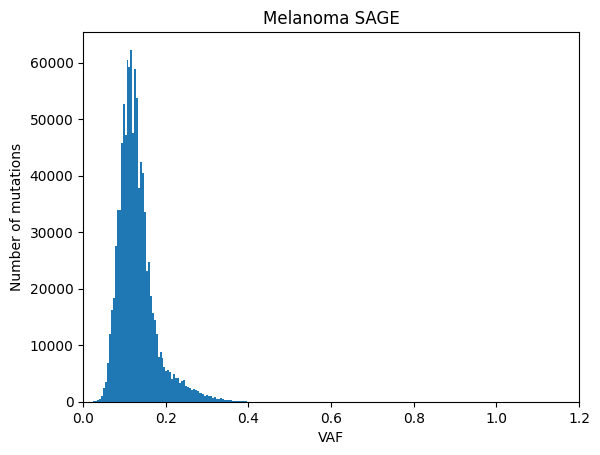

In [113]:
# VAF representation through histogram
plt.hist(vaf_sage_df['VAF'].tolist(), bins = 200)
plt.ylabel('Number of mutations')
plt.xlim([0,1.2]) 
plt.xlabel('VAF')
plt.title('Melanoma SAGE')
plt.show(vaf_sage_df['VAF'].tolist()) 

# 3/ Represent VAF considering SNPs and INDEL mutations

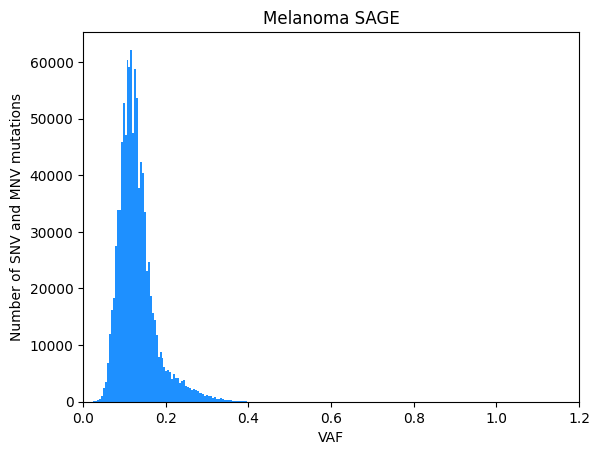

In [117]:
# Now represent VAF of each indel for SNV/INDEL tables obtained above

# For SNV in SAGE
plt.hist(vaf_sage_snv_df['VAF'].tolist(), bins = 200, color = "dodgerblue")
plt.xlim([0,1.2])
plt.ylabel('Number of SNV and MNV mutations')
plt.xlabel('VAF')
plt.title('Melanoma SAGE')
plt.show(vaf_sage_snv_df['VAF'].tolist())  

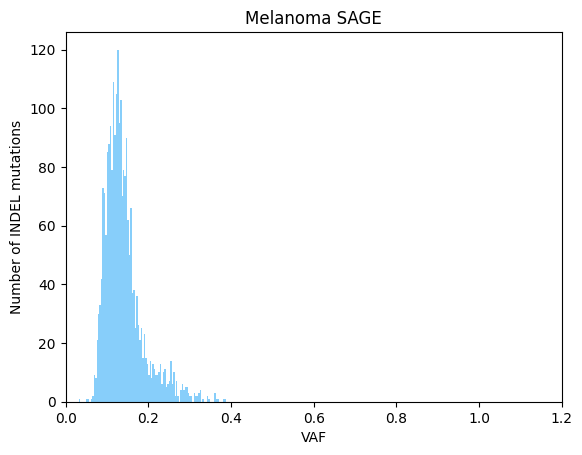

In [118]:
# For INDELs in SAGE

plt.hist(vaf_sage_indels_df['VAF'].tolist(), bins = 100, color = "lightskyblue")
plt.xlim([0,1.2])
plt.ylabel('Number of INDEL mutations')
plt.xlabel('VAF')
plt.title('Melanoma SAGE')
plt.show(vaf_sage_indels_df['VAF'].tolist())  